<a href="https://colab.research.google.com/github/millicentochieng/PROJECT1/blob/main/Millicent_Copy2_of_Kabano_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task #: COVID-19 Research Project


#### Due: November 7th, 2:00 pm Kigali Time


#### Collaborators: Dr. Kabano Ignace, Boris Mikwa, Millicent Ochieng, Rozi Mlay, Aime and Guyo


In [ ]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files
from sklearn.model_selection import train_test_split

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA

#import libraries for implementing neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

import xgboost as xgb
import lightgbm as lgbm

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import warnings

#Installing Time Series Packages

In [ ]:
!pip install ipygee
!pip install tslearn  
!pip install earthengine-api
!pip install geopandas
!pip install pyramid-arima
!pip install fbprophet 

#Loading timeseries libraries

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from random import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from pylab import rcParams
from pyramid.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Loading  Data


In [ ]:
# Read  data
data = pd.read_csv('https://raw.githubusercontent.com/Guyodub/dataset/main/data.csv') 
data.head(3) # show the first 3 rows of the dataset

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,06/11/2020,6,11,2020,40,0,Afghanistan,AF,AFG,38041757.0,Asia,3.546103
1,05/11/2020,5,11,2020,121,6,Afghanistan,AF,AFG,38041757.0,Asia,3.745884
2,04/11/2020,4,11,2020,86,4,Afghanistan,AF,AFG,38041757.0,Asia,3.782685


In [ ]:
data['countriesAndTerritories'].value_counts()

Austria                                       312
Denmark                                       312
France                                        312
Switzerland                                   312
Sweden                                        312
                                             ... 
Lesotho                                       176
Cases_on_an_international_conveyance_Japan     64
Solomon_Islands                                22
Wallis_and_Futuna                              21
Marshall_Islands                                9
Name: countriesAndTerritories, Length: 213, dtype: int64

In [ ]:
data_EA = data[(data.countriesAndTerritories == 'Kenya') | (data.countriesAndTerritories == 'Uganda') | (data.countriesAndTerritories == 'Rwanda')
| (data.countriesAndTerritories == 'South_Sudan')]
data_EA.head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26946,06/11/2020,6,11,2020,1008,21,Kenya,KE,KEN,52573967.0,Africa,23.553482
26947,05/11/2020,5,11,2020,1494,12,Kenya,KE,KEN,52573967.0,Africa,23.667607
26948,04/11/2020,4,11,2020,492,12,Kenya,KE,KEN,52573967.0,Africa,21.771231


In [ ]:
data_EA.countryterritoryCode.value_counts()

KEN    238
RWA    237
UGA    230
SSD    215
Name: countryterritoryCode, dtype: int64

In [ ]:
data_EA.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,920.000000,920.000000,920.0,920.000000,920.000000,9.200000e+02,868.000000
mean,15.919565,6.933696,2020.0,88.369565,1.395652,3.050603e+07,3.160900
std,8.935146,2.205680,0.0,178.896637,3.240451,1.855846e+07,4.129569
min,1.000000,3.000000,2020.0,-115.000000,0.000000,1.106211e+07,0.006777
25%,8.000000,5.000000,2020.0,4.000000,0.000000,1.262694e+07,0.444625
50%,16.000000,7.000000,2020.0,14.000000,0.000000,4.426959e+07,1.375473
75%,24.000000,9.000000,2020.0,90.250000,1.000000,5.257397e+07,4.093427
max,31.000000,11.000000,2020.0,1494.000000,30.000000,5.257397e+07,23.667607


In [ ]:
 df1=data_EA.groupby('countriesAndTerritories')
df1

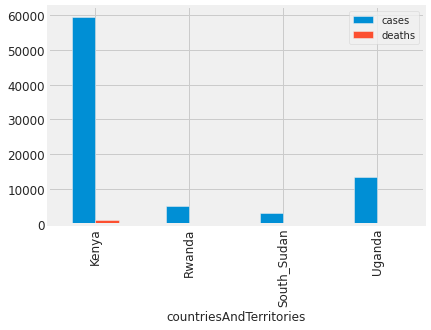

In [ ]:
# Total cases/deaths per country
df2=df1.sum()[['cases','deaths']]
df2.plot(kind="bar")

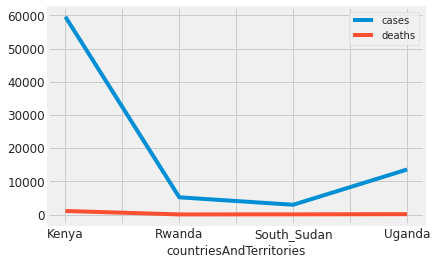

In [ ]:
df2.plot()

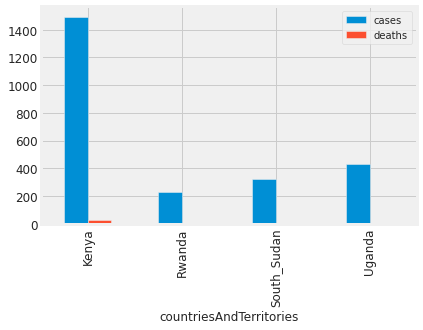

In [ ]:
#Maximum cases/deaths by country
df3=df1.max()[['cases','deaths']]
df3.plot(kind="bar")

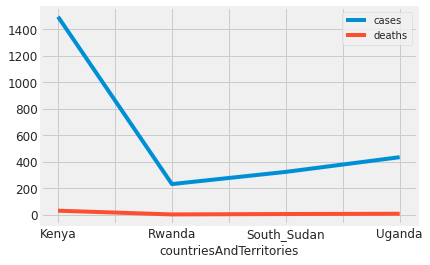

In [ ]:
df3.plot()

In [ ]:
df4=data_EA.groupby(['countriesAndTerritories','month'])

In [ ]:
df5=df4.sum()[['cases','deaths']]
df5

cases  deaths
countriesAndTerritories month               
Kenya                   3         50       1
                        4        334      14
                        5       1504      48
                        6       4302      81
                        7      13723     181
                        8      14144     249
                        9       4321     133
                        10     15419     274
                        11      5798      91
Rwanda                  3         70       0
                        4        155       0
                        5        134       1
                        6        642       1
                        7        993       3
                        8       2026      11
                        9        816      13
                        10       298       6
                        11        58       1
South_Sudan             4         34       0
                        5        960      10
                        6       1012      27
                        7        316       9
                        8        197       1
                        9        181       2
                        10       203       9
                        11        42       1
Uganda                  3         33       0
                        4         48       0
                        5        332       0
                        6        457       0
                        7        277       2
                        8       1781      28
                        9       5089      45
                        10      4393      35
                        11      1158       7

In [ ]:
df5.columns

Index(['cases', 'deaths'], dtype='object')

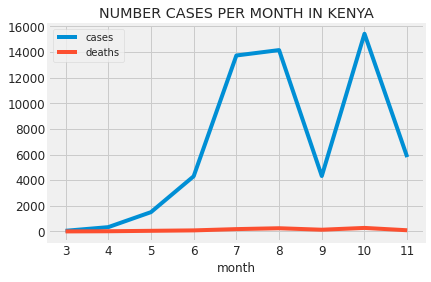

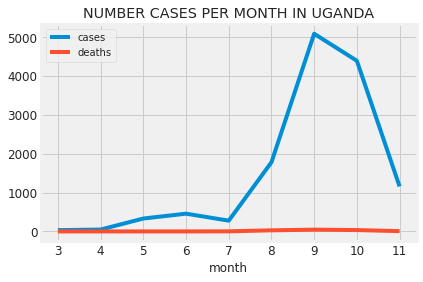

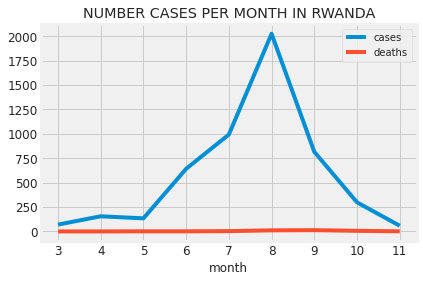

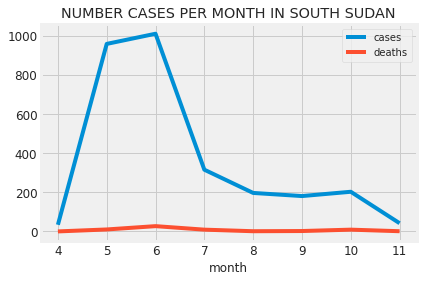

In [ ]:
df6=df5.loc['Kenya',]
df6.plot(title="NUMBER CASES PER MONTH IN KENYA")
df7=df5.loc['Uganda',]
df7.plot(title="NUMBER CASES PER MONTH IN UGANDA")
df8=df5.loc['Rwanda',]
df8.plot(title="NUMBER CASES PER MONTH IN RWANDA")
df9=df5.loc['South_Sudan',]
df9.plot(title="NUMBER CASES PER MONTH IN SOUTH SUDAN")


##Ploting them on the same figure

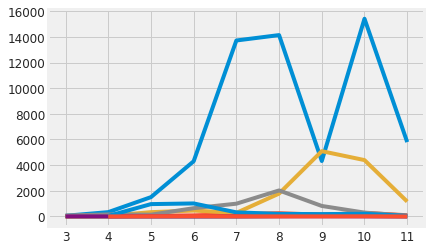

In [ ]:
df6=df5.loc['Kenya',]
df7=df5.loc['Uganda',]
df8=df5.loc['Rwanda',]
df9=df5.loc['South_Sudan',]

fig = plt.figure()
plt.plot(df6, '-')
plt.plot(df7, '-')
plt.plot(df8, '-')
plt.plot(df9, '-');

## Average cases per month

In [ ]:
# Average Monthly cases/Deaths per countery
df4.mean()[['cases','deaths']]

cases     deaths
countriesAndTerritories month                       
Kenya                   3        2.777778   0.055556
                        4       11.133333   0.466667
                        5       48.516129   1.548387
                        6      143.400000   2.700000
                        7      442.677419   5.838710
                        8      456.258065   8.032258
                        9      144.033333   4.433333
                        10     497.387097   8.838710
                        11     966.333333  15.166667
Rwanda                  3        4.117647   0.000000
                        4        5.166667   0.000000
                        5        4.322581   0.032258
                        6       21.400000   0.033333
                        7       32.032258   0.096774
                        8       65.354839   0.354839
                        9       27.200000   0.433333
                        10       9.612903   0.193548
                        11       9.666667   0.166667
South_Sudan             4        1.360000   0.000000
                        5       30.967742   0.322581
                        6       33.733333   0.900000
                        7       10.193548   0.290323
                        8        6.354839   0.032258
                        9        6.033333   0.066667
                        10       6.548387   0.290323
                        11       7.000000   0.166667
Uganda                  3        3.300000   0.000000
                        4        1.600000   0.000000
                        5       10.709677   0.000000
                        6       15.233333   0.000000
                        7        8.935484   0.064516
                        8       57.451613   0.903226
                        9      169.633333   1.500000
                        10     141.709677   1.129032
                        11     193.000000   1.166667

## Avearage Cases/Deaths per Country

In [ ]:
# Average Cases/ Deaths from the start to date
df1.mean()[['cases','deaths']]

,cases,deaths
countriesAndTerritories,,
Kenya,250.399160,4.504202
Rwanda,21.907173,0.151899
South_Sudan,13.697674,0.274419
Uganda,58.991304,0.508696


**Result Interpretation**

This Implies that on average Kenya records  **250** cases and **5** deaths per day. This is followed by Uganda recording **59** Cases and **1** Death daily. South Sudan is seen to be the country recording the lower cases and but a little higher deaths than Rwanda. That is **14** cases and **22** cases for South Sudan and Rwanda respectively.

## **Additive Models in Python using the Facebook Prophet package**

Time series additve model to model the seasonal variation in the cases between March when most countries observed the first case to November 2020.


**Question:**


How is the trend of COVID-19 Cases in the different countries?

In [ ]:
data_EA.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26946,06/11/2020,6,11,2020,1008,21,Kenya,KE,KEN,52573967.0,Africa,23.553482
26947,05/11/2020,5,11,2020,1494,12,Kenya,KE,KEN,52573967.0,Africa,23.667607
26948,04/11/2020,4,11,2020,492,12,Kenya,KE,KEN,52573967.0,Africa,21.771231
26949,03/11/2020,3,11,2020,724,14,Kenya,KE,KEN,52573967.0,Africa,21.921496
26950,02/11/2020,2,11,2020,685,17,Kenya,KE,KEN,52573967.0,Africa,20.915294


In [ ]:
data_EA.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

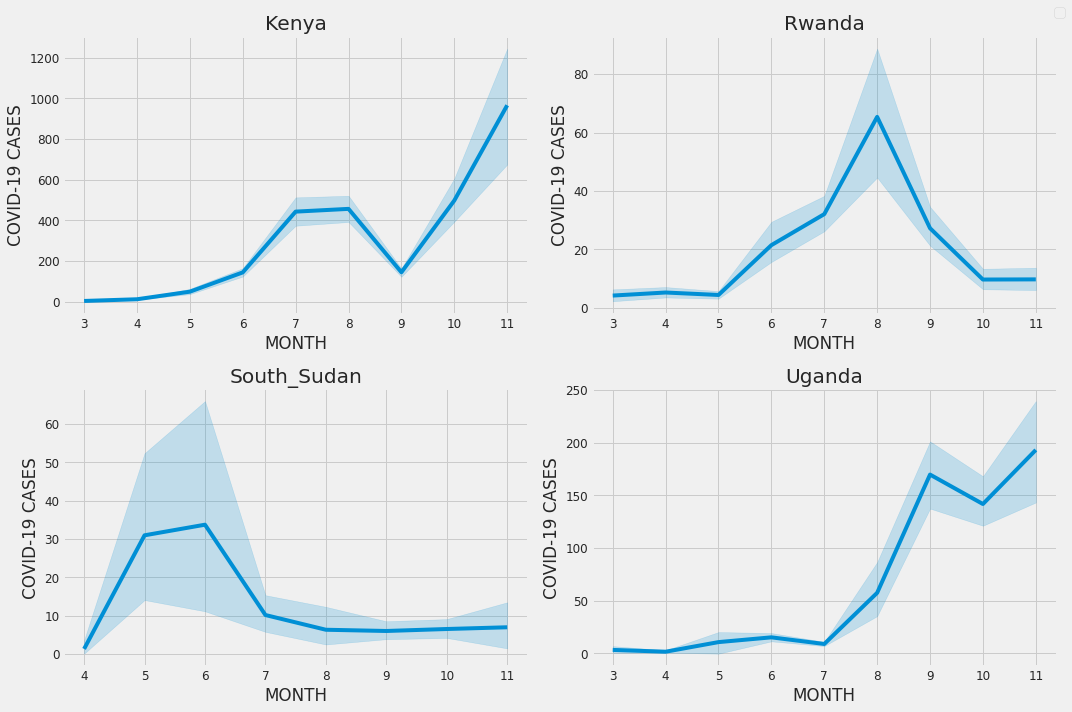

In [ ]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
axes = axes.flatten()
for i, ax in zip(data_EA['countriesAndTerritories'].unique(), axes):
  sns.lineplot(x = 'month', y = 'cases', data = data_EA[data_EA['countriesAndTerritories'] == i], ax = ax)
  ax.set_xlabel('MONTH')
  ax.set_ylabel('COVID-19 CASES')
  ax.set_title('{}'.format(i))
  # ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=1)
fig.subplots_adjust(top=0.95)
for i in range(4,4):
  fig.delaxes(axes[i])
plt.tight_layout()

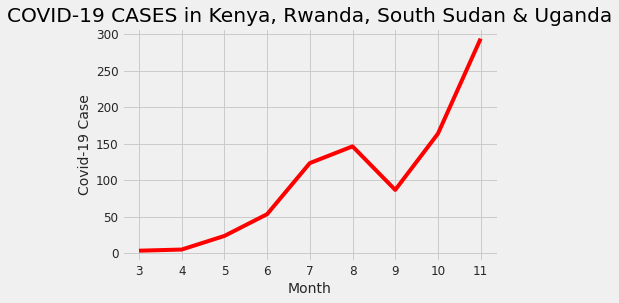

In [ ]:
# Quick Visualization of the usd exchange rate in all the countries combined.

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df10=data_EA[['month','cases']]
df11 = df10.groupby('month').mean()
plt.plot(df11.index, df11['cases'], 'r')
plt.title('COVID-19 CASES in Kenya, Rwanda, South Sudan & Uganda')
plt.ylabel('Covid-19 Case');
plt.xlabel('Month')
plt.show();

In [ ]:
data_EA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 26946 to 50263
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     920 non-null    object 
 1   day                                                         920 non-null    int64  
 2   month                                                       920 non-null    int64  
 3   year                                                        920 non-null    int64  
 4   cases                                                       920 non-null    int64  
 5   deaths                                                      920 non-null    int64  
 6   countriesAndTerritories                                     920 non-null    object 
 7   geoId                                                       920 non-null    object 

In [ ]:
data_EA['dateRep']= pd.to_datetime(data_EA['dateRep'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_EA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 26946 to 50263
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     920 non-null    datetime64[ns]
 1   day                                                         920 non-null    int64         
 2   month                                                       920 non-null    int64         
 3   year                                                        920 non-null    int64         
 4   cases                                                       920 non-null    int64         
 5   deaths                                                      920 non-null    int64         
 6   countriesAndTerritories                                     920 non-null    object        
 7   geoId               

## **Fitting the Prophet Models**

In [ ]:

import fbprophet

# Prophet requires columns ds (Date) and y (value)
covid_cases = data_EA.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
covid_cases_prophet.fit(covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months**

In [ ]:

# Make a future dataframe for 2 months
covid_cases_forecast = covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
covid_cases_forecast = covid_cases_prophet.predict(covid_cases_forecast)

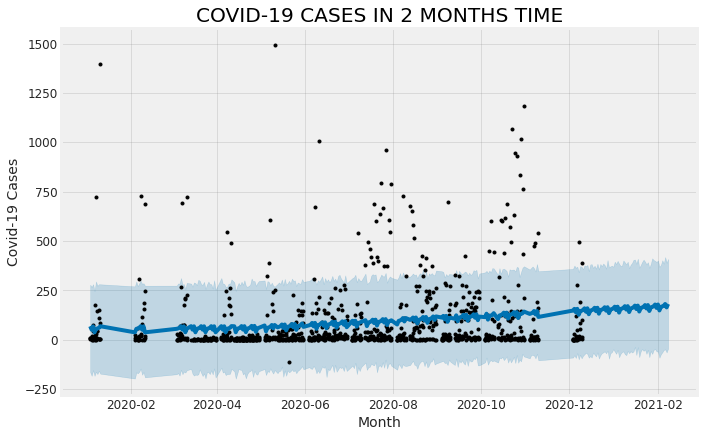

In [ ]:

covid_cases_prophet.plot(covid_cases_forecast, xlabel = 'Month', ylabel = 'Covid-19 Cases')
plt.title('COVID-19 CASES IN 2 MONTHS TIME');

## **Forecasting for 2 Months in Kenya**

Question:

How is the trend of COVID-19 Cases in Kenya from february to November and how will the situation be in December 2020 and January 2021?

In [ ]:
data['dateRep']= pd.to_datetime(data['dateRep'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53802 entries, 0 to 53801
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     53802 non-null  datetime64[ns]
 1   day                                                         53802 non-null  int64         
 2   month                                                       53802 non-null  int64         
 3   year                                                        53802 non-null  int64         
 4   cases                                                       53802 non-null  int64         
 5   deaths                                                      53802 non-null  int64         
 6   countriesAndTerritories                                     53802 non-null  object        
 7   geoId                 

In [ ]:
kenya_df = data[(data.countriesAndTerritories == 'Kenya')]
kenya_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26946,2020-06-11,6,11,2020,1008,21,Kenya,KE,KEN,52573967.0,Africa,23.553482
26947,2020-05-11,5,11,2020,1494,12,Kenya,KE,KEN,52573967.0,Africa,23.667607


In [ ]:
kenya_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 26946 to 27183
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     238 non-null    datetime64[ns]
 1   day                                                         238 non-null    int64         
 2   month                                                       238 non-null    int64         
 3   year                                                        238 non-null    int64         
 4   cases                                                       238 non-null    int64         
 5   deaths                                                      238 non-null    int64         
 6   countriesAndTerritories                                     238 non-null    object        
 7   geoId               

## **Fitting the Prophet Models for Kenya**

In [ ]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
kenya_covid_cases = kenya_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
kenya_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
kenya_covid_cases_prophet.fit(kenya_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in Kenya**

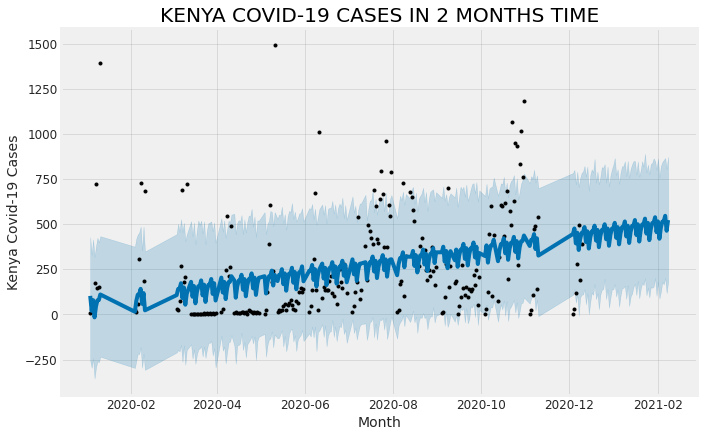

In [ ]:
# Make a future dataframe for 2 months
kenya_covid_cases_forecast = kenya_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
kenya_covid_cases_forecast = kenya_covid_cases_prophet.predict(kenya_covid_cases_forecast)
kenya_covid_cases_prophet.plot(kenya_covid_cases_forecast, xlabel = 'Month', ylabel = 'Kenya Covid-19 Cases')
plt.title('KENYA COVID-19 CASES IN 2 MONTHS TIME');



## **Forecasting for 2 Months in Rwanda**

Question:

How is the trend of COVID-19 Cases in Rwanda from february to November 2020 and how will the situation be in December 2020 and January 2021?

In [ ]:
rwanda_df = data[(data.countriesAndTerritories == 'Rwanda')]
rwanda_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
41181,2020-06-11,6,11,2020,18,1,Rwanda,RW,RWA,12626938.0,Africa,1.385926
41182,2020-05-11,5,11,2020,12,0,Rwanda,RW,RWA,12626938.0,Africa,1.282971


## **Fitting the Prophet Models for Rwanda**

In [ ]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
rwanda_covid_cases = rwanda_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
rwanda_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
rwanda_covid_cases_prophet.fit(rwanda_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in Rwanda**

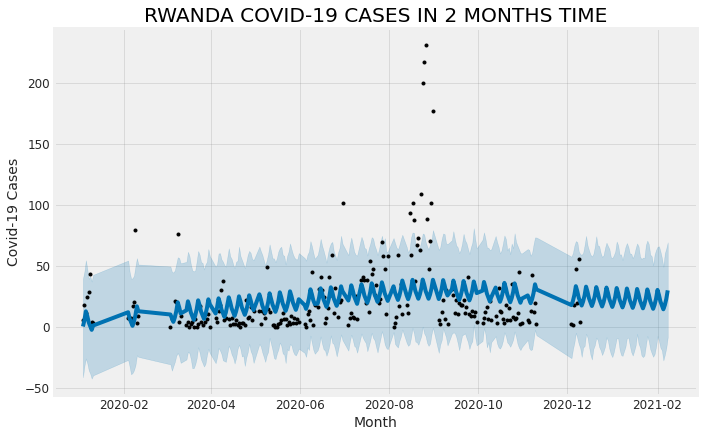

In [ ]:
# Make a future dataframe for 2 months
rwanda_covid_cases_forecast = rwanda_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
rwanda_covid_cases_forecast = rwanda_covid_cases_prophet.predict(rwanda_covid_cases_forecast)
rwanda_covid_cases_prophet.plot(rwanda_covid_cases_forecast, xlabel = 'Month', ylabel = 'Covid-19 Cases')
plt.title('RWANDA COVID-19 CASES IN 2 MONTHS TIME');

## **Forecasting for 2 Months in South Sudan**

Question:

How is the trend of COVID-19 Cases in South Sudan from february to November 2020 and how will the situation be in December 2020 and January 2021?

In [ ]:
SS_df = data[(data.countriesAndTerritories == 'South_Sudan')]
SS_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
45660,2020-06-11,6,11,2020,2,0,South_Sudan,SS,SSD,11062114.0,Africa,0.65991
45661,2020-05-11,5,11,2020,3,0,South_Sudan,SS,SSD,11062114.0,Africa,0.65991


## **Fitting the Prophet Models for South Sudan**

In [ ]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
SS_covid_cases = SS_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
SS_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
SS_covid_cases_prophet.fit(SS_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in South Sudan**

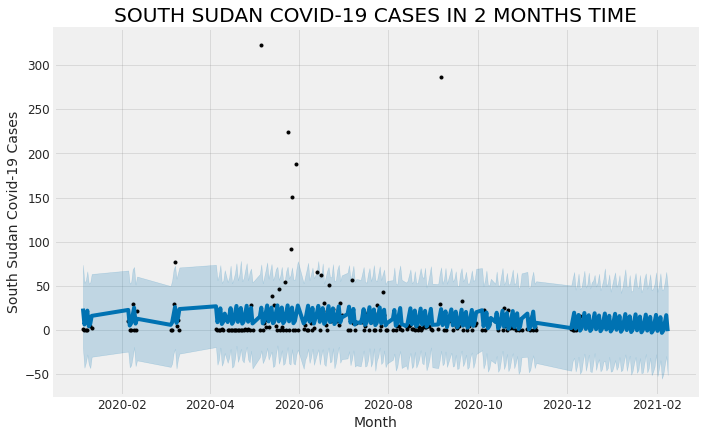

In [ ]:
# Make a future dataframe for 2 months
SS_covid_cases_forecast = SS_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
SS_covid_cases_forecast = SS_covid_cases_prophet.predict(SS_covid_cases_forecast)
SS_covid_cases_prophet.plot(SS_covid_cases_forecast, xlabel = 'Month', ylabel = 'South Sudan Covid-19 Cases')
plt.title('SOUTH SUDAN COVID-19 CASES IN 2 MONTHS TIME');

## **Forecasting for 2 Months in Uganda**

Question:

How is the trend of COVID-19 Cases in Uganda from february to November 2020 and how will the situation be in December 2020 and January 2021?

In [ ]:
uganda_df = data[(data.countriesAndTerritories == 'Uganda')]
uganda_df.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
50034,2020-06-11,6,11,2020,217,0,Uganda,UG,UGA,44269587.0,Africa,5.708208
50035,2020-05-11,5,11,2020,252,2,Uganda,UG,UGA,44269587.0,Africa,5.461989


## **Fitting the Prophet Models for Uganda**

In [ ]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
uganda_covid_cases = uganda_df.rename(columns={'dateRep': 'ds', 'cases': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
uganda_covid_cases_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
uganda_covid_cases_prophet.fit(uganda_covid_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forecasting for 2 Months in Uganda**

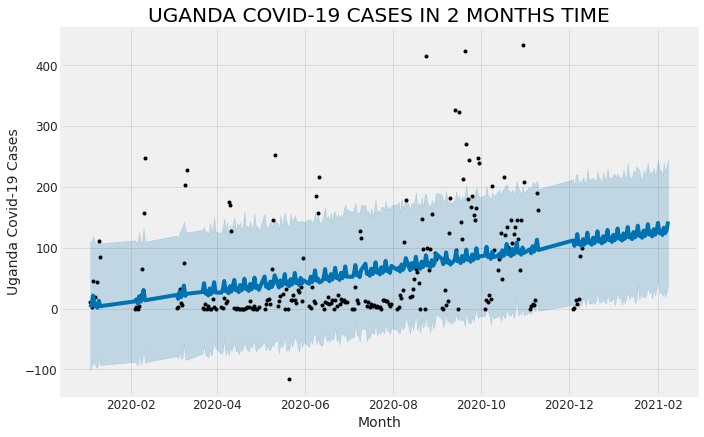

In [ ]:
# Make a future dataframe for 2 months
uganda_covid_cases_forecast = uganda_covid_cases_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
uganda_covid_cases_forecast = uganda_covid_cases_prophet.predict(uganda_covid_cases_forecast)
uganda_covid_cases_prophet.plot(uganda_covid_cases_forecast, xlabel = 'Month', ylabel = 'Uganda Covid-19 Cases')
plt.title('UGANDA COVID-19 CASES IN 2 MONTHS TIME');